# 07 tSNE

In [ ]:
# Setup
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

### 3.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

**t-SNE** e una tecnica non-lineare progettata specificamente per la **visualizzazione** di dati ad alta dimensionalita. Preserva la struttura locale trasformando le distanze in probabilita.

#### Come funziona t-SNE

1. Calcola le similarita tra punti nello spazio originale (distribuzione gaussiana)
2. Inizializza casualmente i punti nello spazio ridotto
3. Calcola le similarita nello spazio ridotto (distribuzione t di Student)
4. Minimizza la divergenza di Kullback-Leibler tra le due distribuzioni

#### Parametro chiave: Perplexity

La **perplexity** (tipicamente 5-50) controlla il bilanciamento tra struttura locale e globale:
- Bassa perplexity: focus sulla struttura locale
- Alta perplexity: considera piu vicini, struttura piu globale

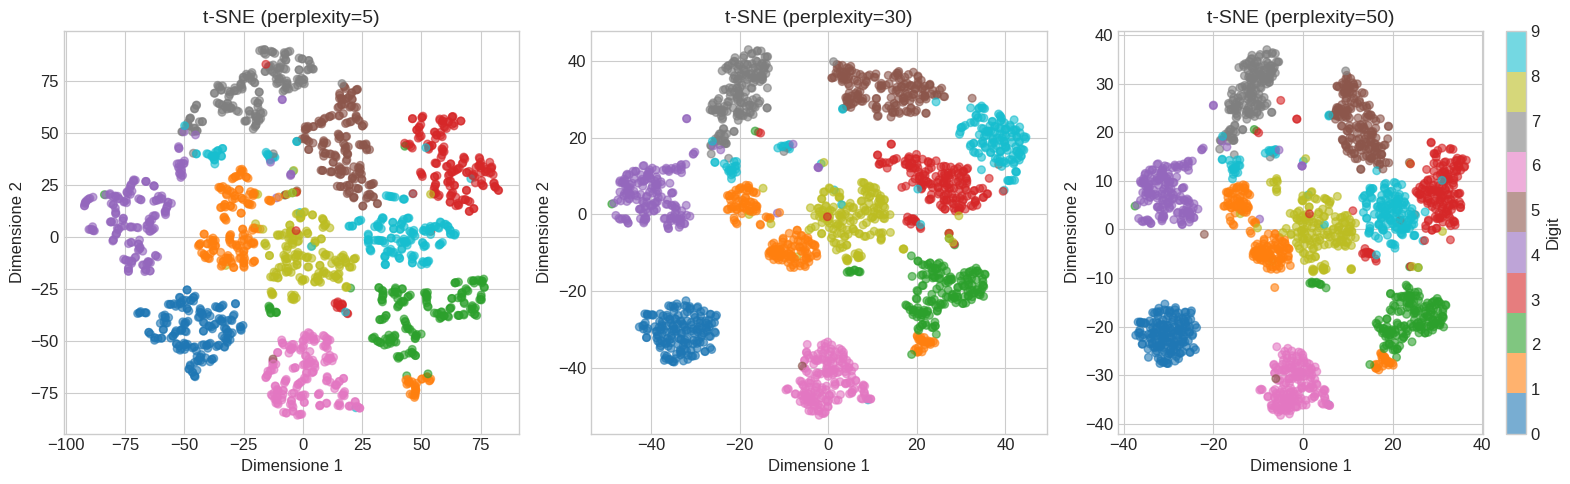

Nota: t-SNE separa molto bene i cluster ma le distanze tra cluster NON sono interpretabili.


In [11]:
# SEZIONE 3.2: t-SNE
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Caricamento dati
digits_tsne = load_digits()
X_tsne = digits_tsne.data
y_tsne = digits_tsne.target

# Standardizzazione
scaler_tsne = StandardScaler()
X_tsne_scaled = scaler_tsne.fit_transform(X_tsne)

# Confronto diverse perplexity
perplexities = [5, 30, 50]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, perp in zip(axes, perplexities):
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate='auto',
        init='pca',
        random_state=42,
        max_iter=1000
    )
    X_tsne_2d = tsne.fit_transform(X_tsne_scaled)

    scatter = ax.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1],
                         c=y_tsne, cmap='tab10', alpha=0.6, s=30)
    ax.set_title(f't-SNE (perplexity={perp})', fontsize=14)
    ax.set_xlabel('Dimensione 1')
    ax.set_ylabel('Dimensione 2')

plt.colorbar(scatter, ax=axes[-1], label='Digit')
plt.tight_layout()
plt.show()

print("Nota: t-SNE separa molto bene i cluster ma le distanze tra cluster NON sono interpretabili.")

**Osservazioni importanti su t-SNE**

- Le distanze tra cluster NON sono significative (solo quelle all'interno)
- Non deterministico: risultati diversi a ogni run
- Lento su grandi dataset: $O(n^2)$
- Non adatto per riduzione dimensionale come preprocessing

**Quando usare t-SNE**

- Visualizzazione di dati complessi
- Esplorazione di cluster
- Dataset di dimensioni moderate (< 10.000 punti)